# Balance Sheet Analysis

# 1.0 Background and Introduction

According to the cfainstitute(https://www.cfainstitute.org/en/membership/professional-development/refresher-readings/understanding-balance-sheets), the balance sheet provides information on a company’s resources (assets) and its sources of capital (equity and liabilities/debt). This information helps an analyst assess a company’s ability to pay for its near-term operating needs, meet future debt obligations, and make distributions to owners. The basic equation underlying the balance sheet is Assets = Liabilities + Equity.

Financial modeling prep (https://site.financialmodelingprep.com/education/the-basics-of-financial-statement-analysis) further states that understanding and analyzing a company's financial statements is an essential skill to make investment decisions. By doing a financial statement analysis, you'll be allowed to recognize the impact of all business activities on the top and bottom line (revenue, costs, and profit).

# 2.0 Data Source

The data set for Netflix balance sheet and income statement from end year 2018 to end year 2022 was pulled from financial modeling prep (https://site.financialmodelingprep.com/how-to/how-to-pull-financial-statements-using-the-fmp-api).

They make it simple as they are a free stock API | historical data API | financial statements API.

# 3.0 Objectives

The objectives of the analysis are as follows:

1. To perform webscraping using financial modeling prep API to extract the balnce sheets and income statements.
2. To calculate various financial ratios key to the business.
3. To illustrate the trend analysis and movements for the financial ratios in Power BI.

In [247]:
#import necessary libraries
import json
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [197]:
# Copy paste the 2 url ratios for both the balance sheet and income statement
# limit indicates number of years back you'd like to explore
# The apikey is hidden as it's private and confidential. It's recommended that you insert yours.
url = "https://financialmodelingprep.com/api/v3/balance-sheet-statement-as-reported/NFLX?limit=6&apikey=hidden-insert-yours"

url2 = "https://financialmodelingprep.com/api/v3/income-statement-as-reported/NFLX?limit=6&apikey=hidden-insert-yours"

In [198]:
# Aids with data parsing
try:
    # For Python 3.0 and later
        from urllib.request import urlopen
except ImportError:
# Fall back to Python 2's urllib2
    from urllib2 import urlopen

In [199]:
# Get balance sheet
def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

In [200]:
# Get income statement
def get_jsonparsed_data(url2):
    """
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    response = urlopen(url2)
    data = response.read().decode("utf-8")
    return json.loads(data)

In [201]:
# Obtain balance sheet data as a json file
BalanceSheet_netflix = get_jsonparsed_data(url)

In [202]:
# Obtain income statement data as a json file
IncomeStat_netflix = get_jsonparsed_data(url2)

In [203]:
# Overview of data
print(BalanceSheet_netflix)

[{'date': '2022-12-31', 'symbol': 'NFLX', 'period': 'FY', 'liabilitiesandstockholdersequity': 48594768000, 'contentassetsnetnoncurrent': 32736713000, 'liabilities': 27817367000, 'liabilitiescurrent': 7930974000, 'commonstocksharesauthorized': 4990000000, 'cashandcashequivalentsatcarryingvalue': 5147176000, 'retainedearningsaccumulateddeficit': 17181296000, 'commonstockvalue': 4637601000, 'preferredstockvalue': 0, 'propertyplantandequipmentnet': 1398257000, 'commonstocksharesissued': 445346776, 'accruedliabilitiescurrent': 1514650000, 'preferredstockparorstatedvaluepershare': 0.001, 'preferredstocksharesauthorized': 10000000, 'treasurystockcommonvalue': 824190000, 'commonstocksharesoutstanding': 445346776, 'otherliabilitiesnoncurrent': 2452040000, 'shorttermborrowings': 0, 'shortterminvestments': 911276000, 'assetscurrent': 9266473000, 'longtermdebtnoncurrent': 14353076000, 'contractwithcustomerliabilitycurrent': 1265000000, 'treasurystockcommonshares': 1564478, 'otherassetsnoncurrent':

In [204]:
# Overview of data
print(IncomeStat_netflix)

[{'date': '2022-12-31', 'symbol': 'NFLX', 'period': 'FY', 'netincomeloss': 4491924000, 'researchanddevelopmentexpense': 2711041000, 'othercomprehensiveincomeforeigncurrencytransactionandtranslationadjustmentnetoftaxportionattributabletoparent': -176811000, 'weightedaveragenumberofdilutedsharesoutstanding': 451290000, 'weightedaveragenumberofsharesoutstandingbasic': 444698000, 'operatingincomeloss': 5632831000, 'marketingexpense': 2530502000, 'nonoperatingincomeexpense': 337310000, 'earningspersharebasic': 10.1, 'incomelossfromcontinuingoperationsbeforeincometaxesextraordinaryitemsnoncontrollinginterest': 5263929000, 'interestexpense': 706212000, 'incometaxexpensebenefit': 772005000, 'earningspersharediluted': 9.95, 'generalandadministrativeexpense': 1572891000, 'costofrevenue': 19168285000, 'revenues': 31615550000, 'comprehensiveincomenetoftax': 4315113000}, {'date': '2021-12-31', 'symbol': 'NFLX', 'period': 'FY', 'netincomeloss': 5116228000, 'othercomprehensiveincomeforeigncurrencytra

In [205]:
# Most Recent Balance Sheet
BalanceSheet_netflix[0]

{'date': '2022-12-31',
 'symbol': 'NFLX',
 'period': 'FY',
 'liabilitiesandstockholdersequity': 48594768000,
 'contentassetsnetnoncurrent': 32736713000,
 'liabilities': 27817367000,
 'liabilitiescurrent': 7930974000,
 'commonstocksharesauthorized': 4990000000,
 'cashandcashequivalentsatcarryingvalue': 5147176000,
 'retainedearningsaccumulateddeficit': 17181296000,
 'commonstockvalue': 4637601000,
 'preferredstockvalue': 0,
 'propertyplantandequipmentnet': 1398257000,
 'commonstocksharesissued': 445346776,
 'accruedliabilitiescurrent': 1514650000,
 'preferredstockparorstatedvaluepershare': 0.001,
 'preferredstocksharesauthorized': 10000000,
 'treasurystockcommonvalue': 824190000,
 'commonstocksharesoutstanding': 445346776,
 'otherliabilitiesnoncurrent': 2452040000,
 'shorttermborrowings': 0,
 'shortterminvestments': 911276000,
 'assetscurrent': 9266473000,
 'longtermdebtnoncurrent': 14353076000,
 'contractwithcustomerliabilitycurrent': 1265000000,
 'treasurystockcommonshares': 1564478,


In [206]:
# Pulling total assets
BalanceSheet_netflix[0] ['assets']

48594768000

In [208]:
# Converting json data to a data frame
balnetflix = pd.DataFrame(BalanceSheet_netflix)
print(balnetflix)

         date symbol period  liabilitiesandstockholdersequity  \
0  2022-12-31   NFLX     FY                       48594768000   
1  2021-12-31   NFLX     FY                       44584663000   
2  2020-12-31   NFLX     FY                       39280359000   
3  2019-12-31   NFLX     FY                       33975712000   
4  2018-12-31   NFLX     FY                       25974400000   

   contentassetsnetnoncurrent  liabilities  liabilitiescurrent  \
0                 32736713000  27817367000          7930974000   
1                 30919539000  28735415000          8488966000   
2                 25383950000  28215119000          7805785000   
3                 24504567000  26393555000          6855696000   
4                 14960954000  20735635000          6487320000   

   commonstocksharesauthorized  cashandcashequivalentsatcarryingvalue  \
0                   4990000000                             5147176000   
1                   4990000000                             6027804

In [253]:
# Converting json data into a data frame
isnetflix = pd.DataFrame(IncomeStat_netflix)

# Column details
isnetflix
isnetflix.info()

         date symbol period  netincomeloss  researchanddevelopmentexpense  \
0  2022-12-31   NFLX     FY     4491924000                   2.711041e+09   
1  2021-12-31   NFLX     FY     5116228000                            NaN   
2  2020-12-31   NFLX     FY     2761395000                            NaN   
3  2019-12-31   NFLX     FY     1866916000                            NaN   
4  2018-12-31   NFLX     FY     1211242000                            NaN   

   othercomprehensiveincomeforeigncurrencytransactionandtranslationadjustmentnetoftaxportionattributabletoparent  \
0                                         -176811000                                                               
1                                          -84893000                                                               
2                                           67919000                                                               
3                                           -3939000                     

In [231]:
# Balance sheet columns info
balnetflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 40 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   date                                             5 non-null      object 
 1   symbol                                           5 non-null      object 
 2   period                                           5 non-null      object 
 3   liabilitiesandstockholdersequity                 5 non-null      int64  
 4   contentassetsnetnoncurrent                       5 non-null      int64  
 5   liabilities                                      5 non-null      int64  
 6   liabilitiescurrent                               5 non-null      int64  
 7   commonstocksharesauthorized                      5 non-null      int64  
 8   cashandcashequivalentsatcarryingvalue            5 non-null      int64  
 9   retainedearningsaccumulateddeficit  

In [232]:
print(isnetflix.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 25 columns):
 #   Column                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                         --------------  -----  
 0   date                                                                                                           5 non-null      object 
 1   symbol                                                                                                         5 non-null      object 
 2   period                                                                                                         5 non-null      object 
 3   netincomeloss                                                                                                  5 non-null      int64  
 4   researchanddevelopmentexpense                         

In [233]:
# Drop columns not needed in this analysis
isnetflix.drop(isnetflix.columns[[4,5, 6, 7,12, 20,21,22,23,24]], axis=1, inplace=True)
# first 5 rows
isnetflix.head()

,date,symbol,period,netincomeloss,operatingincomeloss,marketingexpense,nonoperatingincomeexpense,earningspersharebasic,interestexpense,incometaxexpensebenefit,earningspersharediluted,generalandadministrativeexpense,costofrevenue,revenues,comprehensiveincomenetoftax
0,2022-12-31,NFLX,FY,4491924000,5632831000,2530502000,337310000,10.10,706212000,772005000,9.95,1572891000,19168285000,31615550000,4315113000
1,2021-12-31,NFLX,FY,5116228000,6194509000,2545146000,411214000,11.55,765620000,723875000,11.24,1351621000,17332683000,29697844000,5031335000
2,2020-12-31,NFLX,FY,2761395000,4585289000,2228362000,-618441000,6.26,767499000,437954000,6.08,1076486000,15276319000,24996056000,2829314000
3,2019-12-31,NFLX,FY,1866916000,2604254000,2652462000,84000000,4.26,626023000,195315000,4.13,914369000,12440213000,20156447000,1862977000
4,2018-12-31,NFLX,FY,1211242000,1605226000,2369469000,41725000,2.78,420493000,15216000,2.68,630294000,9967538000,15794341000,1212217000


In [234]:
# Merging the 2 data sets on year

merged1 = pd.merge(balnetflix, isnetflix, on='date')
print(merged1.head())

merged1.info()



         date symbol_x period_x  liabilitiesandstockholdersequity  \
0  2022-12-31     NFLX       FY                       48594768000   
1  2021-12-31     NFLX       FY                       44584663000   
2  2020-12-31     NFLX       FY                       39280359000   
3  2019-12-31     NFLX       FY                       33975712000   
4  2018-12-31     NFLX       FY                       25974400000   

   contentassetsnetnoncurrent  liabilities  liabilitiescurrent  \
0                 32736713000  27817367000          7930974000   
1                 30919539000  28735415000          8488966000   
2                 25383950000  28215119000          7805785000   
3                 24504567000  26393555000          6855696000   
4                 14960954000  20735635000          6487320000   

   commonstocksharesauthorized  cashandcashequivalentsatcarryingvalue  \
0                   4990000000                             5147176000   
1                   4990000000            

# 4.0 Description of the Ratios

a. Current Ratio - This is the difference between current assets and current liabilities. The higher the ratio is, the more capable you are of paying off your debts.A current ratio of 1.0 or greater is considered acceptable for most businesses.

b. Quick Ratio - This is the ratio between quickly available or liquid assets and current liabilities.Whereas the quick ratio only includes a company's most highly liquid assets, like cash, the current ratio factors in all of a company's current assets — including those that may not be as easy to convert into cash, such as inventory. Both ratios compare assets against the business's current liabilities.

c. Debt to Equity Ratio - Shows how much debt a company has compared to its equity. What counts as a “good” debt-to-equity (D/E) ratio will depend on the nature of the business and its industry. Generally speaking, a debt to equity ratio below 1 would be seen as relatively safe, whereas values of 2 or higher might be considered risky.

d. Debt to Assets Ratio - Shows the degree to which a company's operations are funded by debt. A debt to assets ratio of 0.8 means that four-fifth of the business is owned by creditors and one-fifth by shareholders. 

e. Net debt - Reflects a company's ability to meet all of its obligations simultaneously using only those assets that are easily liquidated.

f. Return on Assets Ratio - Indicates how profitable a company is in relation to its total assets i.e. how well a company is generating profits from its total assets which is important when investing.

g. Return on Equity Ratio - A gauge of a corporation's profitability and how efficiently it generates those profits. The higher the ROE, the better a company is at converting its equity financing into profits.

h. Gross Profit Margin - Gross margin represents the portion of each dollar your business retains. For example, if your gross margin is 30%, you are earning $0.30 for each dollar of revenue you earn.
 

In [293]:
# Current Ratio
merged1['Current Ratio'] = merged1['assetscurrent'] / merged1['liabilitiescurrent']

# Quick Ratio
merged1['Quick Ratio'] = merged1['cashandcashequivalentsatcarryingvalue']/merged1['liabilitiescurrent']

# Debt to Equity Ratio
merged1['Debt-to-Equity Ratio'] = merged1['liabilities'] / (merged1['assets']-merged1['liabilities'])

# Debt to Assets Ratio
merged1['Debt-to-Assets Ratio'] = merged1['liabilities']/merged1['assets']

# Net debt

merged1['Net Debt'] = merged1['liabilities'] - merged1['cashandcashequivalentsatcarryingvalue']
                          
# Return on Assets

merged1['ROA'] = merged1['netincomeloss']/ merged1['assets']                          

# Return on Equity
                          
merged1['ROE'] = merged1['netincomeloss']/(merged1['assets']-merged1['liabilities'])
                          
# Gross Profit Margin
                          
merged1['Gross-Profit-Margin'] = ((merged1['revenues'] - merged1['costofrevenue'])/merged1['revenues'])*100
                          
merged1

,date,symbol_x,period_x,liabilitiesandstockholdersequity,contentassetsnetnoncurrent,liabilities,liabilitiescurrent,commonstocksharesauthorized,cashandcashequivalentsatcarryingvalue,retainedearningsaccumulateddeficit,...,revenues,comprehensiveincomenetoftax,Current Ratio,Quick Ratio,Debt-to-Equity Ratio,Debt-to-Capital Ratio,Net Debt,ROA,ROE,Gross-Profit-Margin
0,2022-12-31,NFLX,FY,48594768000,32736713000,27817367000,7930974000,4990000000,5147176000,17181296000,...,31615550000,4315113000,1.168390,0.648997,1.338828,0.572435,22670191000,0.092436,0.216193,39.370705
1,2021-12-31,NFLX,FY,44584663000,30919539000,28735415000,8488966000,4990000000,6027804000,12689372000,...,29697844000,5031335000,0.950625,0.710075,1.813046,0.644513,22707611000,0.114753,0.322806,41.636561
2,2020-12-31,NFLX,FY,39280359000,25383950000,28215119000,7805785000,4990000000,8205550000,7573144000,...,24996056000,2829314000,1.250557,1.051214,2.549888,0.718301,20009569000,0.070300,0.249556,38.885083
3,2019-12-31,NFLX,FY,33975712000,24504567000,26393555000,6855696000,4990000000,5018437000,4811749000,...,20156447000,1862977000,0.901222,0.732010,3.481009,0.776836,21375118000,0.054949,0.246225,38.281717
4,2018-12-31,NFLX,FY,25974400000,14960954000,20735635000,6487320000,4990000000,3794483000,2942359000,...,15794341000,1212217000,1.494320,0.584908,3.958115,0.798310,16941152000,0.046632,0.231208,36.891713


In [294]:
# Only output I need is the ratios and year

merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 62 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   date                                             5 non-null      object 
 1   symbol_x                                         5 non-null      object 
 2   period_x                                         5 non-null      object 
 3   liabilitiesandstockholdersequity                 5 non-null      int64  
 4   contentassetsnetnoncurrent                       5 non-null      int64  
 5   liabilities                                      5 non-null      int64  
 6   liabilitiescurrent                               5 non-null      int64  
 7   commonstocksharesauthorized                      5 non-null      int64  
 8   cashandcashequivalentsatcarryingvalue            5 non-null      int64  
 9   retainedearningsaccumulateddeficit  

In [295]:
# Select required columns by Index
list_of_column_positions=[0,54,55,56,57,58,59,60,61]
finratios=merged1.iloc[:,list_of_column_positions]
print(finratios)

         date  Current Ratio  Quick Ratio  Debt-to-Equity Ratio  \
0  2022-12-31       1.168390     0.648997              1.338828   
1  2021-12-31       0.950625     0.710075              1.813046   
2  2020-12-31       1.250557     1.051214              2.549888   
3  2019-12-31       0.901222     0.732010              3.481009   
4  2018-12-31       1.494320     0.584908              3.958115   

   Debt-to-Capital Ratio     Net Debt       ROA       ROE  Gross-Profit-Margin  
0               0.572435  22670191000  0.092436  0.216193            39.370705  
1               0.644513  22707611000  0.114753  0.322806            41.636561  
2               0.718301  20009569000  0.070300  0.249556            38.885083  
3               0.776836  21375118000  0.054949  0.246225            38.281717  
4               0.798310  16941152000  0.046632  0.231208            36.891713  


In [297]:
# Converting date to month and year
finratios['date'] = pd.to_datetime(finratios['date'])
finratios['year'] = finratios['date'].dt.strftime("%Y")
finratios.info()
print(finratios)

# Check error and update to most recent updates
finratios.to_csv("C:/Users/kinyanjuim/Desktop/H2_Projects_2023/Balance-Sheet-Analysis/finratios.csv")

C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_15664\4149674040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finratios['date'] = pd.to_datetime(finratios['date'])
C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_15664\4149674040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finratios['year'] = finratios['date'].dt.strftime("%Y")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   5 non-null      datetime64[ns]
 1   Current Ratio          5 non-null      float64       
 2   Quick Ratio            5 non-null      float64       
 3   Debt-to-Equity Ratio   5 non-null      float64       
 4   Debt-to-Capital Ratio  5 non-null      float64       
 5   Net Debt               5 non-null      int64         
 6   ROA                    5 non-null      float64       
 7   ROE                    5 non-null      float64       
 8   Gross-Profit-Margin    5 non-null      float64       
 9   year                   5 non-null      object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 440.0+ bytes
        date  Current Ratio  Quick Ratio  Debt-to-Equity Ratio  \
0 2022-12-31       1.168390     0.64899

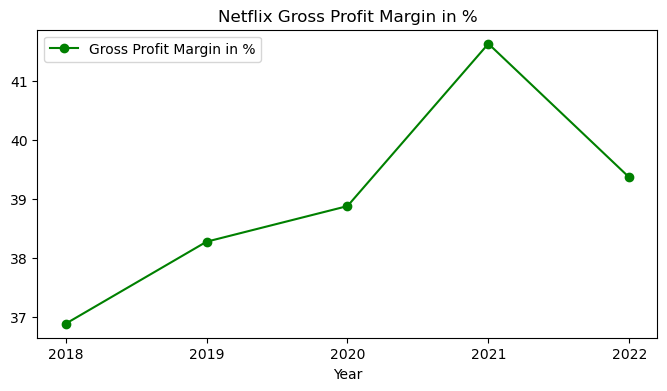

In [298]:
# Trend Analyis 1
# Set up plot
fig, ax = plt.subplots(figsize=(8,4))
# Sort the DataFrame by 'Year' in ascending order
fin = finratios.sort_values(by='year')

# Plot a simple line chart
plt.plot(fin['year'], fin['Gross-Profit-Margin'], color='g', label='Gross Profit Margin in %', marker ='o')

plt.title('Netflix Gross Profit Margin in %')
plt.xlabel('Year')
plt.ylabel('')
plt.legend()
plt.show()